# Area Plot Gallery

The area plot is used for visualizing data distributions over time or across categories using filled area charts. It's ideal for showing trends and comparisons between different groups by stacking or overlaying areas.

Area plots excel at:
- **Time series visualization**: Show trends in metrics over time (e.g., revenue by month)
- **Stacked area charts**: Compare contributions of different groups over time
- **Category-based distributions**: Visualize data distributions across categories


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from pyretailscience.plots import area

# Set figure size for all plots
plt.rcParams["figure.figsize"] = [10, 6]
# Add spacing around plots and between code/output
plt.rcParams["figure.subplot.top"] = 0.85
plt.rcParams["figure.subplot.bottom"] = 0.2
plt.rcParams["figure.subplot.left"] = 0.1
plt.rcParams["figure.subplot.right"] = 0.9
# Add space between code cell and plot output
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["savefig.pad_inches"] = 0.3

## Basic Area Plot

Plot a single value column from a DataFrame using the index as x-axis.

---

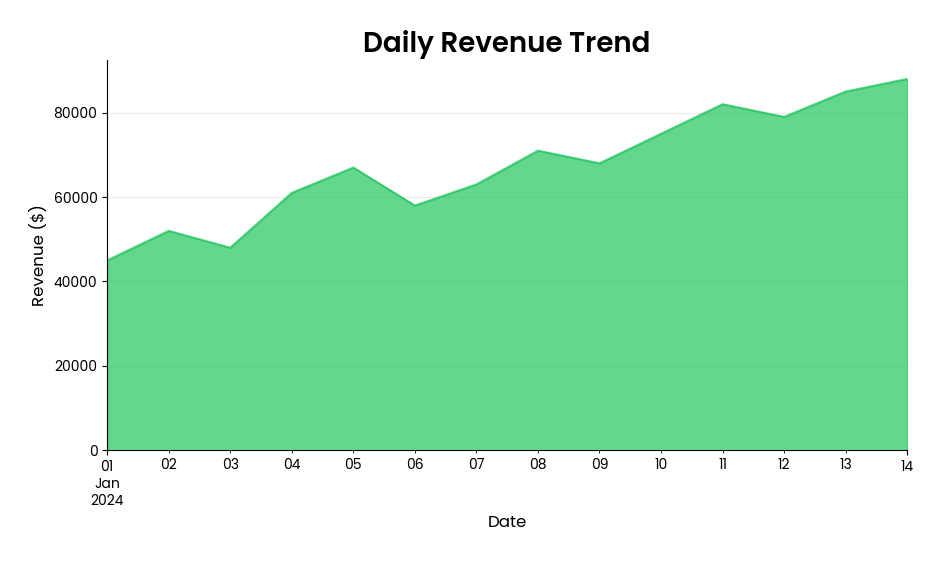

In [ ]:
# Create sample daily revenue data
daily_revenue = pd.DataFrame(
    {
        "revenue": [45000, 52000, 48000, 61000, 67000, 58000, 63000, 71000, 68000, 75000, 82000, 79000, 85000, 88000],
    },
    index=pd.date_range("2024-01-01", periods=14, freq="D"),
)

ax = area.plot(
    daily_revenue,
    value_col="revenue",
    title="Daily Revenue Trend",
    x_label="Date",
    y_label="Revenue ($)",
)
plt.show()

## Using x_col Parameter

Specify a column to use as the x-axis instead of the DataFrame index.

---

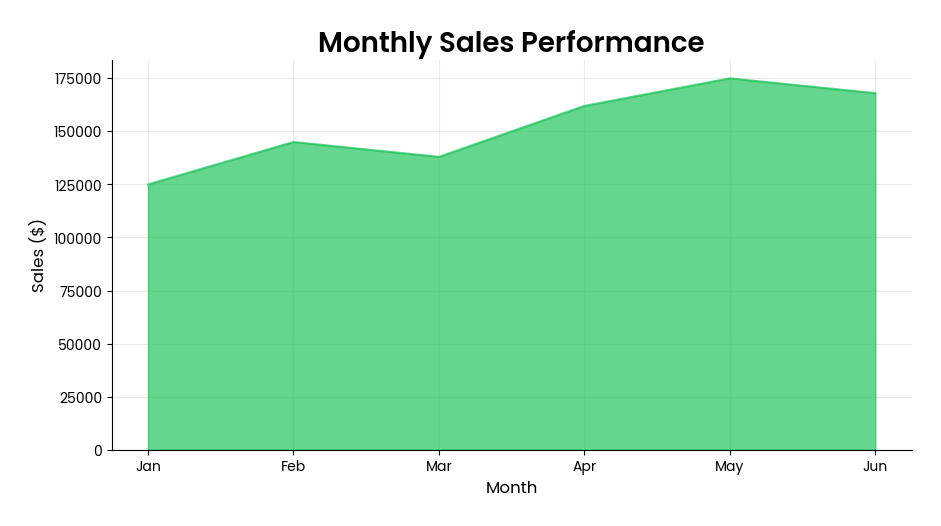

In [ ]:
# Create sample data with explicit month column
monthly_sales = pd.DataFrame(
    {
        "month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun"],
        "sales": [125000, 145000, 138000, 162000, 175000, 168000],
    },
)

ax = area.plot(
    monthly_sales,
    x_col="month",
    value_col="sales",
    title="Monthly Sales Performance",
    x_label="Month",
    y_label="Sales ($)",
)
plt.show()

## Multiple Areas with group_col

Create separate areas for each category using the `group_col` parameter. This automatically creates a legend and uses different colors for each group.

---

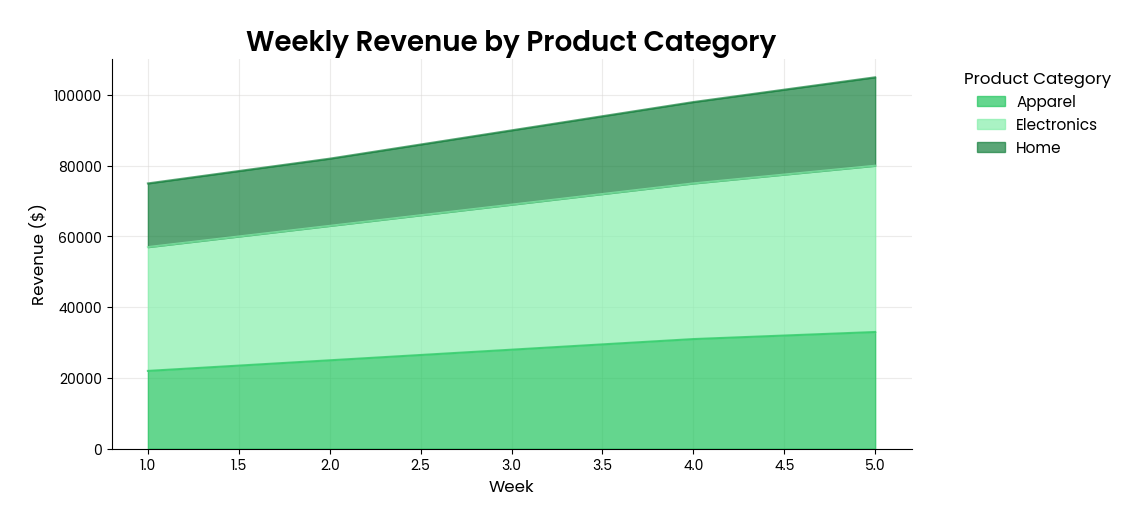

In [ ]:
# Create sample data with multiple product categories
category_data = pd.DataFrame(
    {
        "week": [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5],
        "category": ["Electronics", "Apparel", "Home"] * 5,
        "revenue": [
            35000,
            22000,
            18000,
            38000,
            25000,
            19000,
            41000,
            28000,
            21000,
            44000,
            31000,
            23000,
            47000,
            33000,
            25000,
        ],
    },
)

ax = area.plot(
    category_data,
    x_col="week",
    value_col="revenue",
    group_col="category",
    title="Weekly Revenue by Product Category",
    x_label="Week",
    y_label="Revenue ($)",
    legend_title="Product Category",
    move_legend_outside=True,
)
plt.show()

## Multiple Value Columns

Plot multiple metrics by passing a list to `value_col`. Note: This cannot be combined with `group_col`.

---

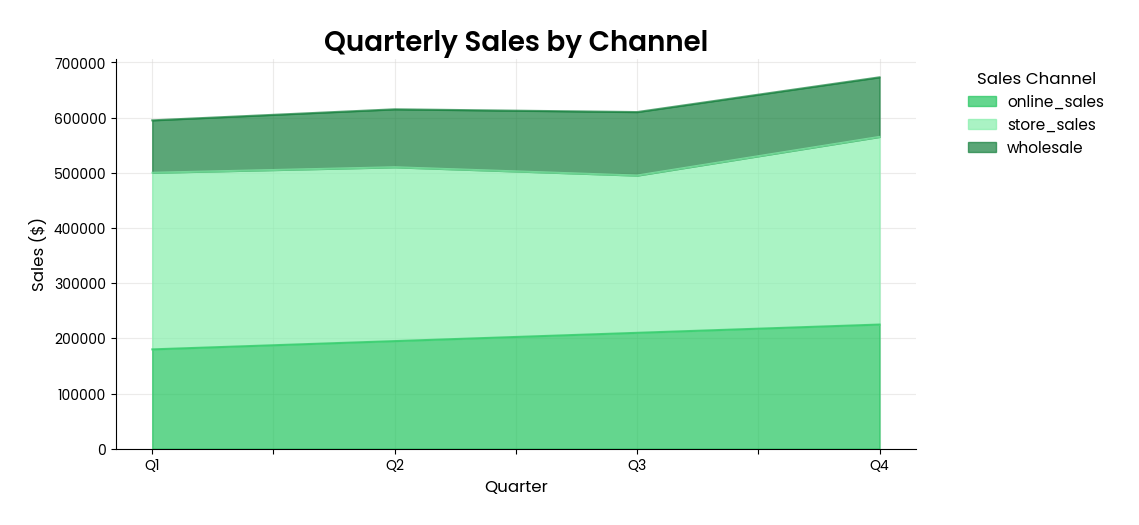

In [ ]:
# Create sample data with multiple metrics
metrics_data = pd.DataFrame(
    {
        "quarter": ["Q1", "Q2", "Q3", "Q4"],
        "online_sales": [180000, 195000, 210000, 225000],
        "store_sales": [320000, 315000, 285000, 340000],
        "wholesale": [95000, 105000, 115000, 108000],
    },
)

ax = area.plot(
    metrics_data,
    x_col="quarter",
    value_col=["online_sales", "store_sales", "wholesale"],
    title="Quarterly Sales by Channel",
    x_label="Quarter",
    y_label="Sales ($)",
    legend_title="Sales Channel",
    move_legend_outside=True,
)
plt.show()

## Stacked Areas

Create stacked areas using the `stacked=True` parameter to show cumulative values.

---

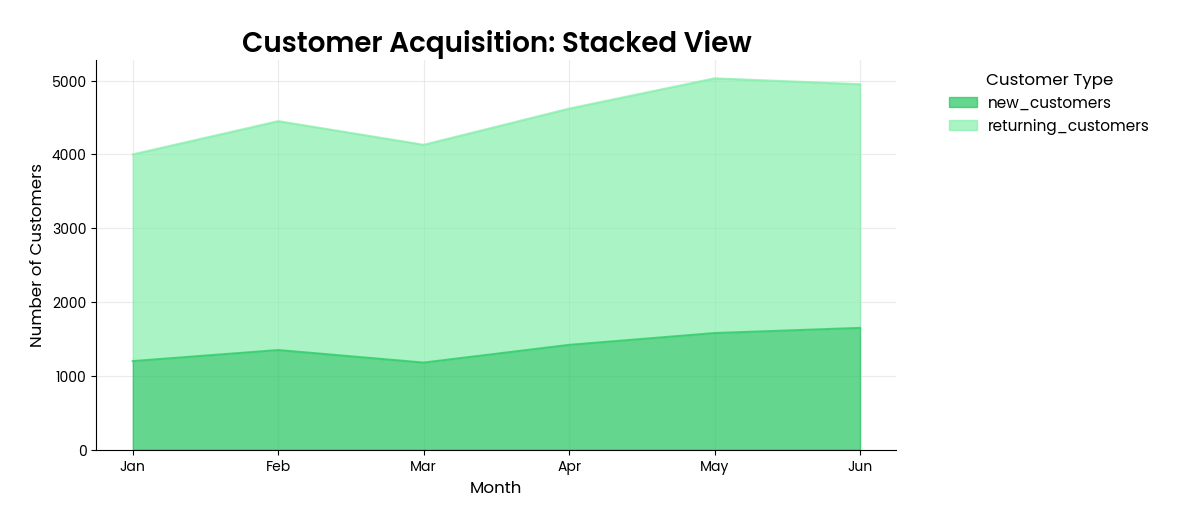

In [ ]:
# Create sample data for stacked areas
stacked_data = pd.DataFrame(
    {
        "month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun"],
        "new_customers": [1200, 1350, 1180, 1420, 1580, 1650],
        "returning_customers": [2800, 3100, 2950, 3200, 3450, 3300],
    },
)

ax = area.plot(
    stacked_data,
    x_col="month",
    value_col=["new_customers", "returning_customers"],
    title="Customer Acquisition: Stacked View",
    x_label="Month",
    y_label="Number of Customers",
    legend_title="Customer Type",
    stacked=True,
    move_legend_outside=True,
)
plt.show()

## Plotting a Pandas Series

You can also plot a pandas Series directly, which automatically uses the Series name and index.

---

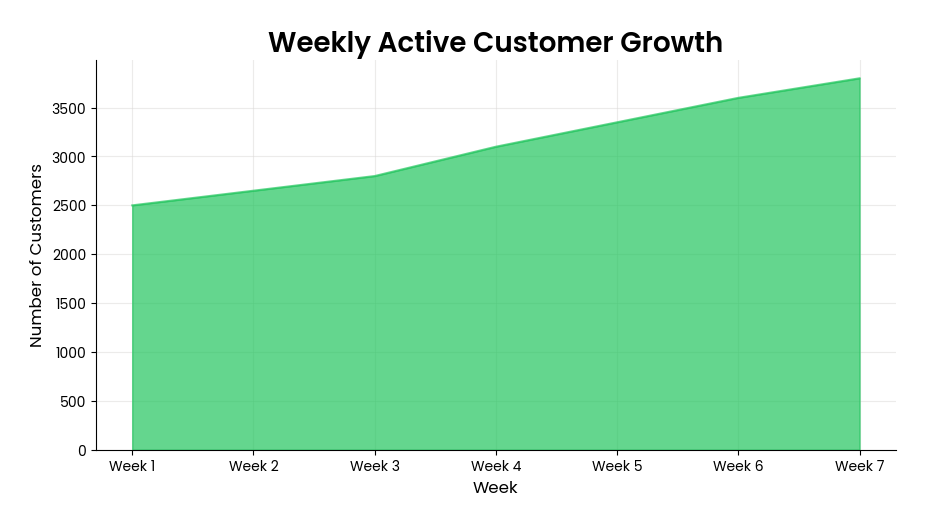

In [ ]:
# Create a pandas Series
customer_growth = pd.Series(
    [2500, 2650, 2800, 3100, 3350, 3600, 3800],
    index=["Week 1", "Week 2", "Week 3", "Week 4", "Week 5", "Week 6", "Week 7"],
    name="Active Customers",
)

ax = area.plot(
    customer_growth,
    value_col="Active Customers",
    title="Weekly Active Customer Growth",
    x_label="Week",
    y_label="Number of Customers",
)
plt.show()

## Advanced Styling Options

Customize the appearance with transparency, source attribution, and legend positioning.

---

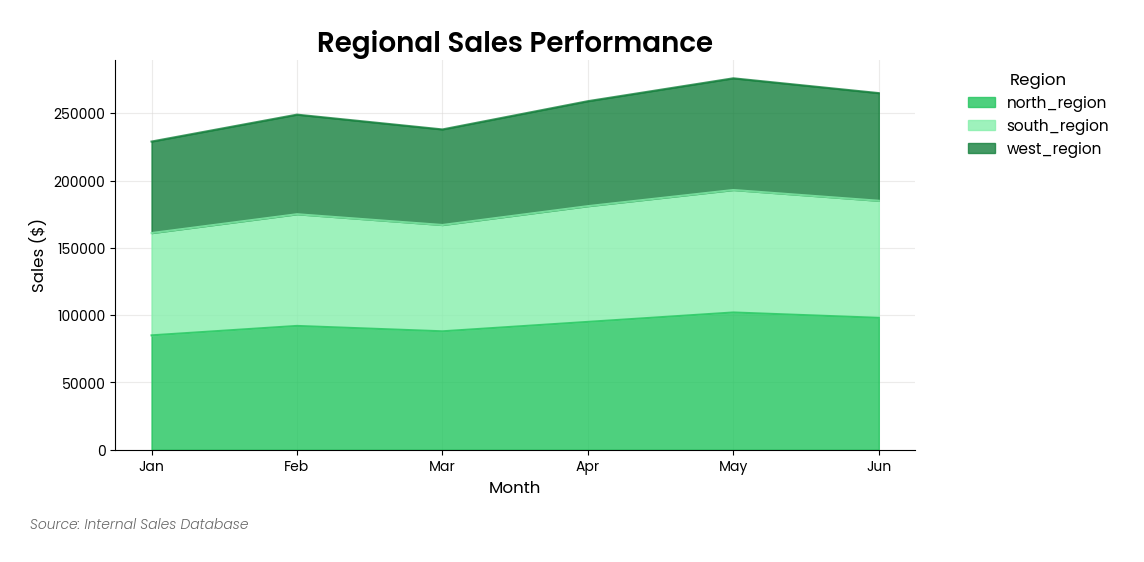

In [ ]:
# Create sample regional data
regional_data = pd.DataFrame(
    {
        "month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun"],
        "north_region": [85000, 92000, 88000, 95000, 102000, 98000],
        "south_region": [76000, 83000, 79000, 86000, 91000, 87000],
        "west_region": [68000, 74000, 71000, 78000, 83000, 80000],
    },
)

ax = area.plot(
    regional_data,
    x_col="month",
    value_col=["north_region", "south_region", "west_region"],
    title="Regional Sales Performance",
    x_label="Month",
    y_label="Sales ($)",
    legend_title="Region",
    move_legend_outside=True,
    source_text="Source: Internal Sales Database",
    alpha=0.8,
)
plt.show()